In [2]:
import pandas as pd
df=pd.read_csv("car.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [61]:
df.rename(columns={"vhigh":"Buying"}, inplace=True)
df.rename(columns={"vhigh.1":"Maint"}, inplace=True)
df.rename(columns={"2":"Doors"}, inplace=True)
df.rename(columns={"2.1":"Persons"}, inplace=True)
df.rename(columns={"small":"Lug_Boot"}, inplace=True)
df.rename(columns={"low":"Safety"}, inplace=True)
df.rename(columns={"unacc":"Class"}, inplace=True)


In [9]:
df.head()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
"""
Replacing Values that are string

buying: vhigh:4, high:3, med:2, low:1.

maint: vhigh:4, high:3, med:2, low:1.

doors: 2, 3, 4, 5more:6.

persons: 2, 4, more:5.

lug_boot: small:1, med:2, big:3.

safety: low:1, med:2, high:3. 
"""

'\nbuying: vhigh:4, high:3, med:2, low:1.\n\nmaint: vhigh:4, high:3, med:2, low:1.\n\ndoors: 2, 3, 4, 5more:6.\n\npersons: 2, 4, more:5.\n\nlug_boot: small:1, med:2, big:3.\n\nsafety: low:1, med:2, high:3. \n'

In [28]:
df["Buying"].replace({"vhigh": 4, "high": 3, "med":2, "low":1}, inplace=True)
df["Maint"].replace({"vhigh": 4, "high": 3, "med":2, "low":1}, inplace=True)
df["Doors"].replace({"5more":6}, inplace=True)
df["Persons"].replace({"more":5}, inplace=True)
df["Lug_Boot"].replace({"big": 3, "med":2, "small":1}, inplace=True)
df["Safety"].replace({"high": 3, "med":2, "low":1}, inplace=True)


In [24]:
df.head()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,3,3,2,2,1,2,unacc
1,3,3,2,2,1,3,unacc
2,3,3,2,2,2,1,unacc
3,3,3,2,2,2,2,unacc
4,3,3,2,2,2,3,unacc


In [14]:
for col in df.columns:
    if df[col].isnull().values.any():
        print(col, df[col].isnull().sum())
    else:
        print(col,"No Null values")

Buying No Null values
Maint No Null values
Doors No Null values
Persons No Null values
Lug_Boot No Null values
Safety No Null values
Class No Null values


In [15]:
for column in df.columns:
    print(column,df[column].nunique())

Buying 4
Maint 4
Doors 4
Persons 3
Lug_Boot 3
Safety 3
Class 4


In [17]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

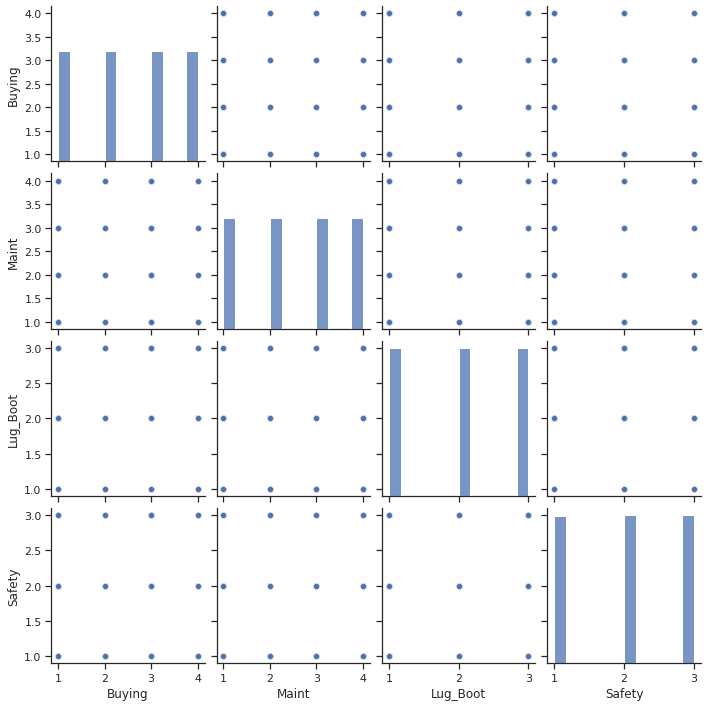

In [19]:
sns.set_theme(style="ticks")
sns.pairplot(df)

In [49]:
from sklearn import preprocessing
df_Car=pd.read_csv("car.csv")
df_Car.rename(columns={"vhigh":"Buying"}, inplace=True)
df_Car.rename(columns={"vhigh.1":"Maint"}, inplace=True)
df_Car.rename(columns={"2":"Doors"}, inplace=True)
df_Car.rename(columns={"2.1":"Persons"}, inplace=True)
df_Car.rename(columns={"small":"Lug_Boot"}, inplace=True)
df_Car.rename(columns={"low":"Safety"}, inplace=True)
df_Car.rename(columns={"unacc":"Class"}, inplace=True)
label_encoder = preprocessing.LabelEncoder()
df_Car['Buying']= label_encoder.fit_transform(df_Car['Buying'])
df_Car['Maint']= label_encoder.fit_transform(df_Car['Maint'])
df_Car['Doors']= label_encoder.fit_transform(df_Car['Doors'])
df_Car['Persons']= label_encoder.fit_transform(df_Car['Persons'])
df_Car['Lug_Boot']= label_encoder.fit_transform(df_Car['Lug_Boot'])
df_Car['Safety']= label_encoder.fit_transform(df_Car['Safety'])
df_Car['Class']= label_encoder.fit_transform(df_Car['Class'])

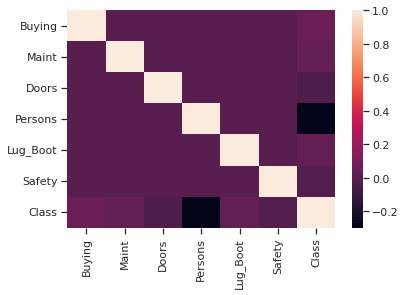

In [50]:
sns.heatmap(df_Car.corr());

In [68]:
from apyori import apriori
df_car2=pd.read_csv("car.csv")
records = []
for i in range(0, 1727):
    records.append([str(df_car2.values[i,j]) for j in range(0, 7)])
    
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

print(len(association_results))
print(association_results[0])


38
RelationRecord(items=frozenset({'vgood', 'big', 'high', '2'}), support=0.005790387955993051, ordered_statistics=[OrderedStatistic(items_base=frozenset({'vgood', '2'}), items_add=frozenset({'big', 'high'}), confidence=1.0, lift=4.7972222222222225)])


In [69]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: vgood -> big
Support: 0.005790387955993051
Confidence: 1.0
Lift: 4.7972222222222225
Rule: vgood -> big
Support: 0.004632310364794441
Confidence: 0.7999999999999999
Lift: 3.8377777777777777
Rule: big -> high
Support: 0.005790387955993051
Confidence: 0.6666666666666666
Lift: 3.198148148148148
Rule: vgood -> high
Support: 0.005790387955993051
Confidence: 0.6666666666666666
Lift: 3.198148148148148
Rule: 4 -> big
Support: 0.01447596988998263
Confidence: 0.38461538461538464
Lift: 3.690170940170941
Rule: low -> big
Support: 0.013896931094383324
Confidence: 0.34782608695652173
Lift: 3.128623188405797
Rule: big -> high
Support: 0.018529241459177764
Confidence: 0.4923076923076923
Lift: 4.428205128205128
Rule: big -> high
Support: 0.013896931094383324
Confidence: 0.36923076923076925
Lift: 3.3211538461538463
Rule: big -> high
Support: 0.011580775911986103
Confidence: 0.3076923076923077
Lift: 4.4282051282051285
Rule: big -> low
Support: 0.009264620729588882
Confidence: 0.24615384615384614
Lif

In [ ]:
"""
Inferneces
1.Higher the quality of the vehicle higher is its safety(vgood -> high)
2.Higher the no of people the car can accomodate, higher is the luggage boot space (more -> big)
3.Cars that are safer have large boot space (high -> big)
4.Cars with lower safety tend to have more maintanence cost (low -> high)
5.Cars with low safety usually have more people capacity (low -> more)
"""